### Example 2 - Generate a random rail

In [1]:
import random
import numpy as np
from flatland.envs.generators import random_rail_generator
from flatland.envs.observations import TreeObsForRailEnv
from flatland.envs.rail_env import RailEnv
from flatland.utils.rendertools import RenderTool
from PIL import Image

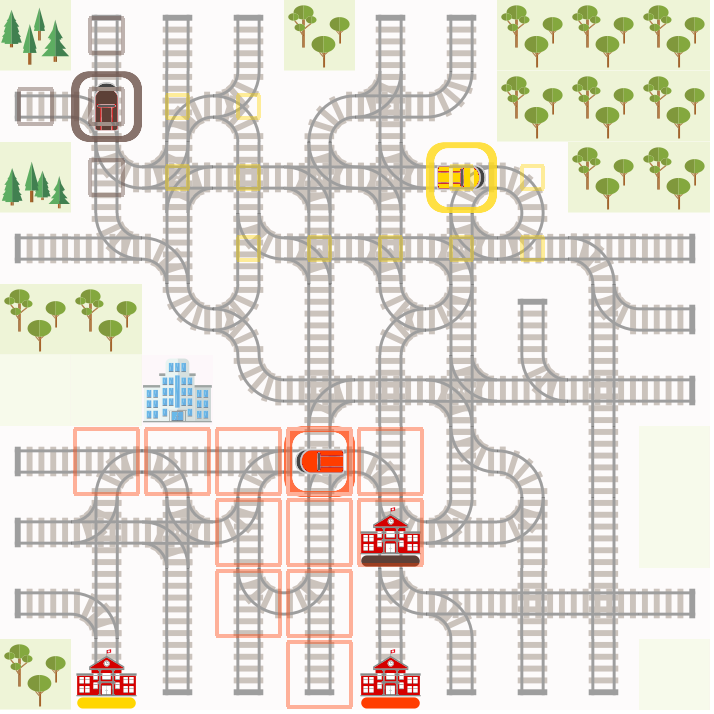

In [2]:
random.seed(100)
np.random.seed(100)

# Relative weights of each cell type to be used by the random rail generators.
transition_probability = [1.0,  # empty cell - Case 0
                          1.0,  # Case 1 - straight
                          1.0,  # Case 2 - simple switch
                          0.3,  # Case 3 - diamond drossing
                          0.5,  # Case 4 - single slip
                          0.5,  # Case 5 - double slip
                          0.2,  # Case 6 - symmetrical
                          0.0,  # Case 7 - dead end
                          0.2,  # Case 8 - turn left
                          0.2,  # Case 9 - turn right
                          1.0]  # Case 10 - mirrored switch

# Example generate a random rail
env = RailEnv(width=10,
              height=10,
              rail_generator=random_rail_generator(cell_type_relative_proportion=transition_probability),
              number_of_agents=3,
              obs_builder_object=TreeObsForRailEnv(max_depth=2))

env.reset()

env_renderer = RenderTool(env, gl="PILSVG")
env_renderer.renderEnv(show=False)
Image.fromarray(env_renderer.gl.getImage())